In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
diabete_df=pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")

In [3]:
diabete_df_clean=diabete_df.drop_duplicates()
diabete_df_clean.reset_index(drop=True,inplace=True)
diabete_df_clean

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229776,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
229777,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
229778,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
229779,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [4]:
#Creating table which contains columns with Binary Data and non-binary
list_with_binary_attributes=['Veggies','HighBP','HighChol','CholCheck','Sex','Stroke','HeartDiseaseorAttack','PhysActivity','Fruits','HighChol','DiffWalk','HvyAlcoholConsump','AnyHealthcare','NoDocbcCost']
BinaryData_df=diabete_df_clean[list_with_binary_attributes]
list_with_no_binary_attributes=['Diabetes_012','BMI','PhysHlth','MentHlth','Age','Income','Education','GenHlth']
NoBinaryData_df=diabete_df_clean[list_with_no_binary_attributes]


In [5]:
#NOW THE AIM HERE IS TO CATEGORIZE (Not Binary Datas) In a way which will be more undestandable 
# (Groping Data- Organizing data) in specified Categories
#1 Obse         BMI >= 30
#2 Overweight   BMI   25-29.9
#3 Healthy      BMI   18.5-24.9
#4 UnderWeight  BMT < 18.5
diabete_weight_group=NoBinaryData_df['BMI']
NoBinaryData_df.loc[diabete_weight_group <18.5, 'Weight_Group']='Under Weight'
NoBinaryData_df.loc[((diabete_weight_group >= 18.5) & (diabete_weight_group <= 24.9)), 'Weight_Group']='Healthy'
NoBinaryData_df.loc[((diabete_weight_group >= 25) & (diabete_weight_group <= 29.9)), 'Weight_Group']='Over Weight'
NoBinaryData_df.loc[diabete_weight_group >=30, 'Weight_Group']='Obse'
###########
#Age_group_detection
#1   Age 18-24
#2   Age 25-29
#3   Age 30-34
#4   Age 35-39
#5   Age 40-44
#6   Age 45-49
#7   Age 50-54
#8   Age 55-59
#9   Age 60-64
#10  Age 65-69
#11  Age 70-74
#12  Age 75_79
#13  Age 80 or older
diabete_age_group=NoBinaryData_df['Age']
NoBinaryData_df.loc[diabete_age_group==1,'Age_Group']='Age 18-24'
NoBinaryData_df.loc[diabete_age_group==2,'Age_Group']='Age 25-29'
NoBinaryData_df.loc[diabete_age_group==3,'Age_Group']='Age 30-34'
NoBinaryData_df.loc[diabete_age_group==4,'Age_Group']='Age 35-39'
NoBinaryData_df.loc[diabete_age_group==5,'Age_Group']='Age 40-44'
NoBinaryData_df.loc[diabete_age_group==6,'Age_Group']='Age 45-49'
NoBinaryData_df.loc[diabete_age_group==7,'Age_Group']='Age 50-54'
NoBinaryData_df.loc[diabete_age_group==8,'Age_Group']='Age 55-59'
NoBinaryData_df.loc[diabete_age_group==9,'Age_Group']='Age 60-64'
NoBinaryData_df.loc[diabete_age_group==10,'Age_Group']='Age 65-69'
NoBinaryData_df.loc[diabete_age_group==11,'Age_Group']='Age 70-74'
NoBinaryData_df.loc[diabete_age_group==12,'Age_Group']='Age 75_79'
NoBinaryData_df.loc[diabete_age_group==13,'Age_Group' ]='Age 80 or older'
###########
#Education_group_detection
#1 Not attended School
#2 Elementary
#3 Some High School
#4 High School Graduated
#5 Some College or Technichal School  
#6 College Graduate
diabete_education_group=NoBinaryData_df['Education']
NoBinaryData_df.loc[diabete_education_group==1,'Education_Level']='Not attended School'
NoBinaryData_df.loc[diabete_education_group==2,'Education_Level']='Elementary'
NoBinaryData_df.loc[diabete_education_group==3,'Education_Level']='Some High School'
NoBinaryData_df.loc[diabete_education_group==4,'Education_Level']='High School Graduated'
NoBinaryData_df.loc[diabete_education_group==5,'Education_Level']='Some College or Technichal School'
NoBinaryData_df.loc[diabete_education_group==6,'Education_Level']='College Graduate'
###################
#Income_level
#1=Less than 10000 $
#2=Less than 15000 $
#3=Less than 20000 $
#4=Less than 25000 $
#5=Less than 35000 $
#6=Less than 50000 $
#7=Less than 75000 $
#8=75000 $ or More
diabete_income_group=NoBinaryData_df['Income']
NoBinaryData_df.loc[diabete_income_group==1,'Income_Level']='Less than 10000 $'
NoBinaryData_df.loc[diabete_income_group==2,'Income_Level']='Less than 15000 $'
NoBinaryData_df.loc[diabete_income_group==3,'Income_Level']='Less than 20000 $'
NoBinaryData_df.loc[diabete_income_group==4,'Income_Level']='Less than 25000 $'
NoBinaryData_df.loc[diabete_income_group==5,'Income_Level']='Less than 35000 $'
NoBinaryData_df.loc[diabete_income_group==6,'Income_Level']='Less than 50000 $'
NoBinaryData_df.loc[diabete_income_group==7,'Income_Level']='Less than 75000 $'
NoBinaryData_df.loc[diabete_income_group==8,'Income_Level']='75000 $ or More'
#General Health:
#1 = excellent,
#2 = very good,
#3 = good,
#4 = fair,
#5 = poor
diabete_GeneralHealth_group=NoBinaryData_df['GenHlth']
NoBinaryData_df.loc[diabete_GeneralHealth_group==1,'GeneralH']='Excellent'
NoBinaryData_df.loc[diabete_GeneralHealth_group==2,'GeneralH']='Very Good'
NoBinaryData_df.loc[diabete_GeneralHealth_group==3,'GeneralH']='Good'
NoBinaryData_df.loc[diabete_GeneralHealth_group==4,'GeneralH']='Fair'
NoBinaryData_df.loc[diabete_GeneralHealth_group==5,'GeneralH']='Poor'
#Diabete Status
# No Diabete=0
# Pre Diabete=1
# Diabete = 2
diabete_type_detection=NoBinaryData_df['Diabetes_012']
NoBinaryData_df.loc[diabete_type_detection==0,'Disease Status']='No Diabete'
NoBinaryData_df.loc[diabete_type_detection==1,'Disease Status']='Pre Diabete'
NoBinaryData_df.loc[diabete_type_detection==2,'Disease Status']='Diabete'


C:\Users\ghadi\anaconda3\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\ghadi\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [6]:
NoBinaryData_df

,Diabetes_012,BMI,PhysHlth,MentHlth,Age,Income,Education,GenHlth,Weight_Group,Age_Group,Education_Level,Income_Level,GeneralH,Disease Status
0,0.0,40.0,15.0,18.0,9.0,3.0,4.0,5.0,Obse,Age 60-64,High School Graduated,Less than 20000 $,Poor,No Diabete
1,0.0,25.0,0.0,0.0,7.0,1.0,6.0,3.0,Over Weight,Age 50-54,College Graduate,Less than 10000 $,Good,No Diabete
2,0.0,28.0,30.0,30.0,9.0,8.0,4.0,5.0,Over Weight,Age 60-64,High School Graduated,75000 $ or More,Poor,No Diabete
3,0.0,27.0,0.0,0.0,11.0,6.0,3.0,2.0,Over Weight,Age 70-74,Some High School,Less than 50000 $,Very Good,No Diabete
4,0.0,24.0,0.0,3.0,11.0,4.0,5.0,2.0,Healthy,Age 70-74,Some College or Technichal School,Less than 25000 $,Very Good,No Diabete
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229776,0.0,45.0,5.0,0.0,5.0,7.0,6.0,3.0,Obse,Age 40-44,College Graduate,Less than 75000 $,Good,No Diabete
229777,2.0,18.0,0.0,0.0,11.0,4.0,2.0,4.0,Under Weight,Age 70-74,Elementary,Less than 25000 $,Fair,Diabete
229778,0.0,28.0,0.0,0.0,2.0,2.0,5.0,1.0,Over Weight,Age 25-29,Some College or Technichal School,Less than 15000 $,Excellent,No Diabete
229779,0.0,23.0,0.0,0.0,7.0,1.0,5.0,3.0,Healthy,Age 50-54,Some College or Technichal School,Less than 10000 $,Good,No Diabete


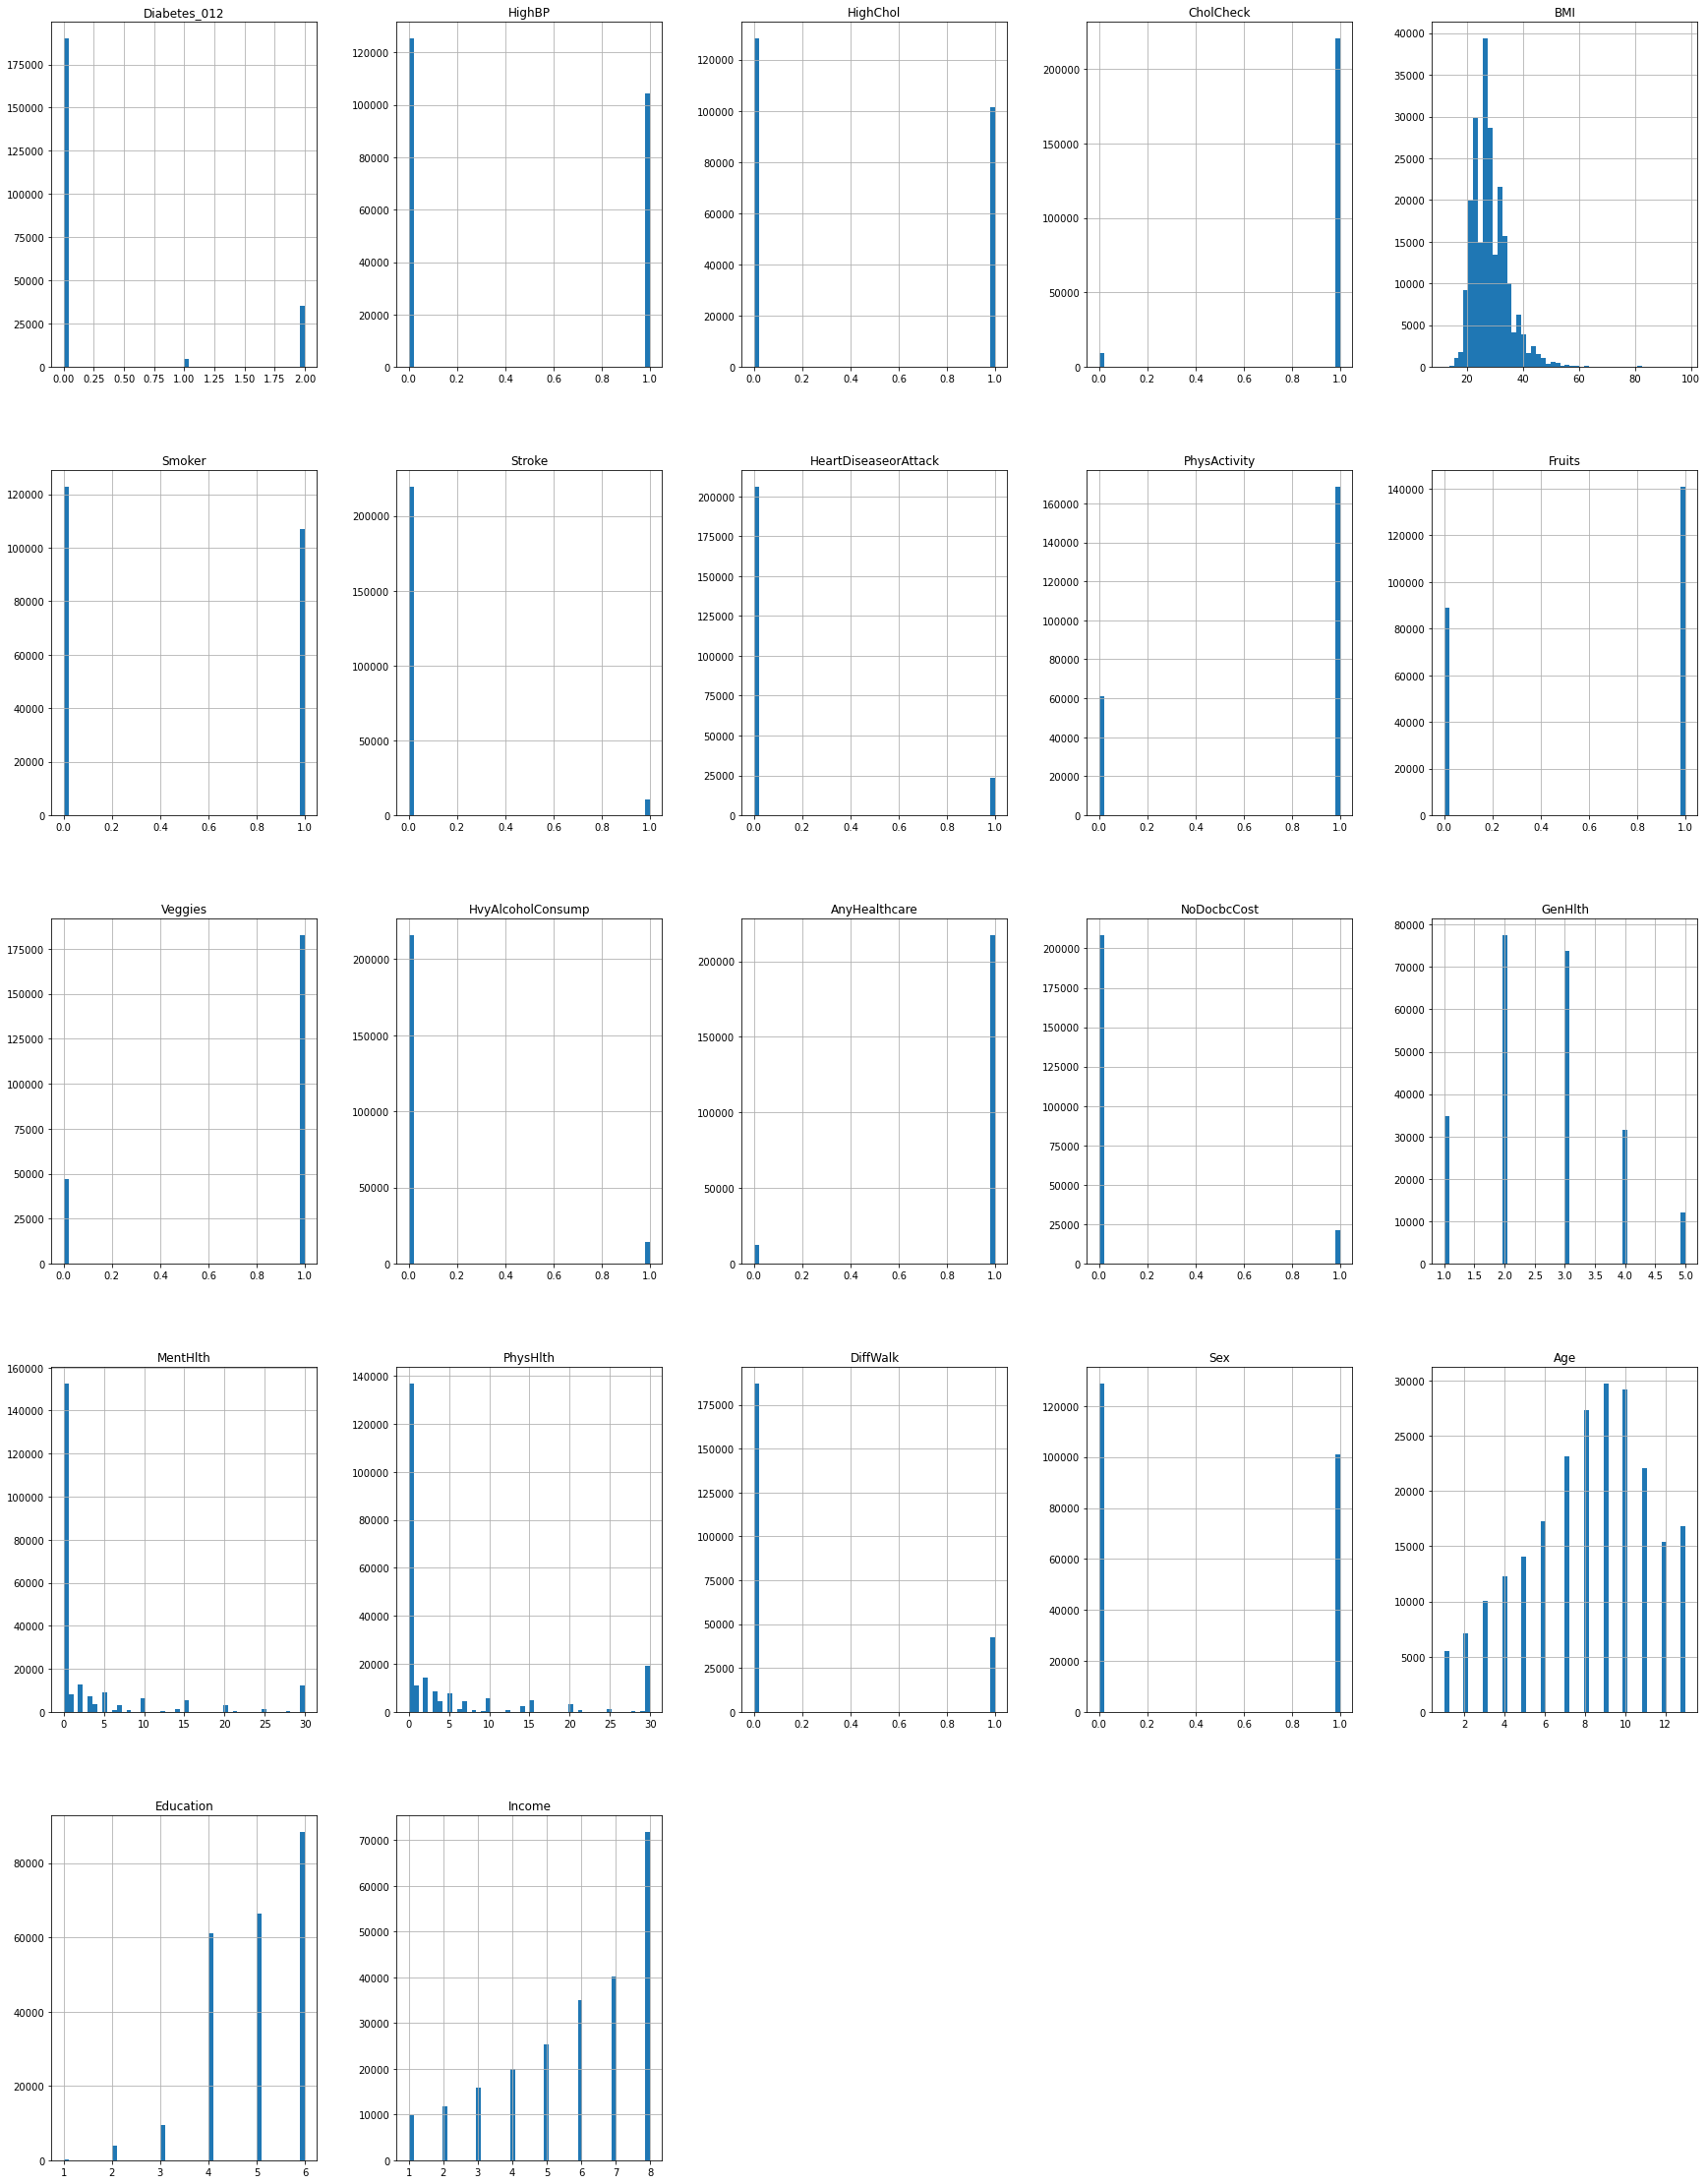

In [23]:
#Histogram 
diabete_df_clean.hist(bins=50,figsize=(30,40))
plt.show()

In [37]:
#Create a New DataFrame with the attributes defined in below list
Non_Binary_List=['GenHlth','Education','Income','Age']
NoBinaryData2_df=NoBinaryData_df[Non_Binary_List]
NoBinaryData2_df

,GenHlth,Education,Income,Age
0,5.0,4.0,3.0,9.0
1,3.0,6.0,1.0,7.0
2,5.0,4.0,8.0,9.0
3,2.0,3.0,6.0,11.0
4,2.0,5.0,4.0,11.0
...,...,...,...,...
229776,3.0,6.0,7.0,5.0
229777,4.0,2.0,4.0,11.0
229778,1.0,5.0,2.0,2.0
229779,3.0,5.0,1.0,7.0


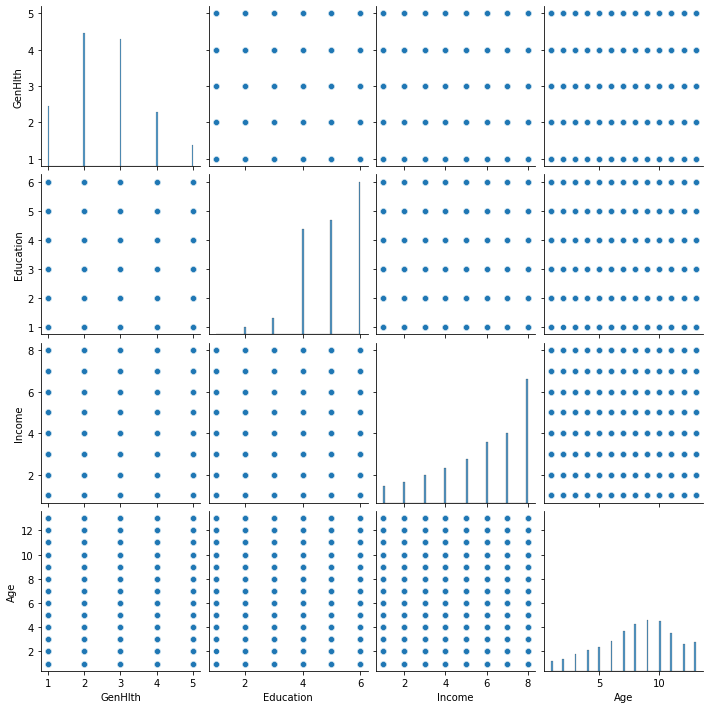

In [38]:
#Create Pair PLot
sb.pairplot(NoBinaryData2_df)
plt.show()

In [7]:
#The General Status in terms of Diabete disease of Pepole (Observations)
NoBinaryData_df['Disease Status'].value_counts()

No Diabete     190055
Diabete         35097
Pre Diabete      4629
Name: Disease Status, dtype: int64

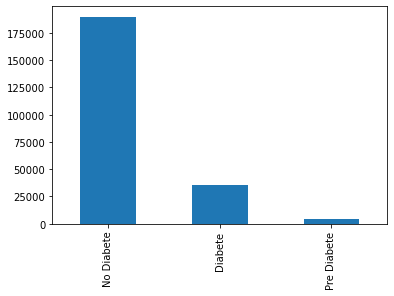

In [9]:
# Showing The General Status in terms of Diabete disease of Pepole in BarChart
NoBinaryData_df['Disease Status'].value_counts().plot.bar()
plt.show()

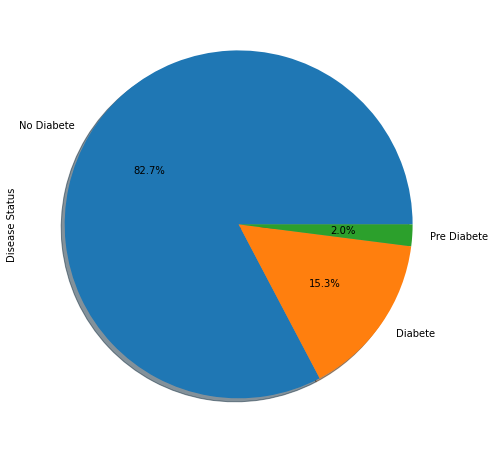

In [24]:
# Showing The General Status in terms of Diabete disease of Pepole in Pie Chart
NoBinaryData_df['Disease Status'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.show()

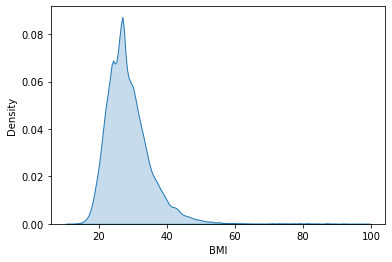

In [13]:
#To check the distribution Of BMI
sb.kdeplot(NoBinaryData_df['BMI'], shade=True)
#plt.hist(diabete_df['BMI'], facecolor='peru', edgecolor='blue', bins=70)
plt.show()
#sb.distplot(d["trtbps"], hist_kws = dict(linewidth = 1, edgecolor = "k"), bins = 20);

C:\Users\ghadi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


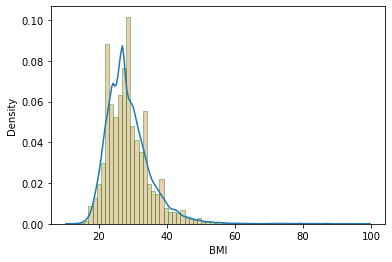

In [14]:
sb.distplot(NoBinaryData_df["BMI"], hist_kws = dict(linewidth = 1,facecolor='peru',edgecolor = "g"),bins = 70);
                                                    

<AxesSubplot:xlabel='GenHlth', ylabel='Density'>

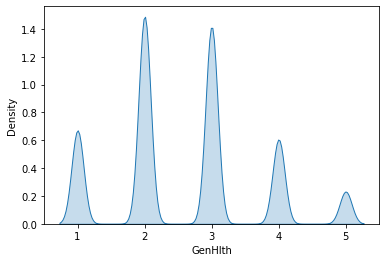

In [15]:
#to check the distribution of GenHlth
#Other types of NonBinary attributes such as (MentHlt,Age,Income,Education,PhysHlth,MentHlth) have -
#the distribution like below since thay have (specified and limited number) in each category
sb.kdeplot(NoBinaryData_df['GenHlth'], shade=True)

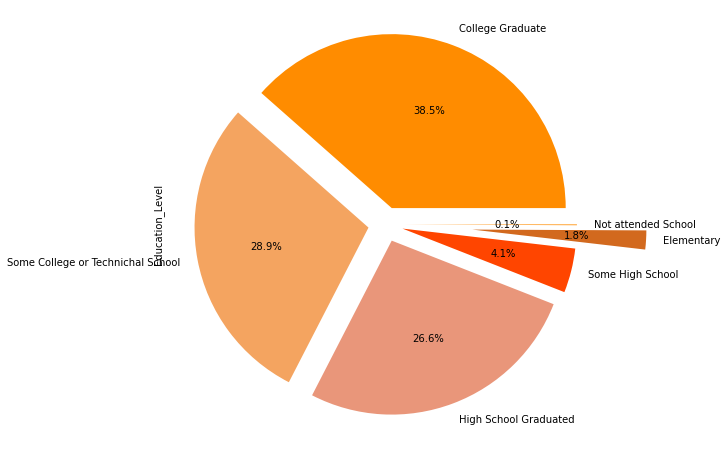

In [16]:
#Showing the Percentage of People with different Education Level
colors = ['darkorange', 'sandybrown','darksalmon', 'orangered','chocolate']
NoBinaryData_df['Education_Level'].value_counts().plot.pie(explode=[0.1,0.1,0.1,0.1,0.5,0.1],autopct='%1.1f%%',colors=colors,shadow=False,figsize=(10,8))
plt.show()

<AxesSubplot:>

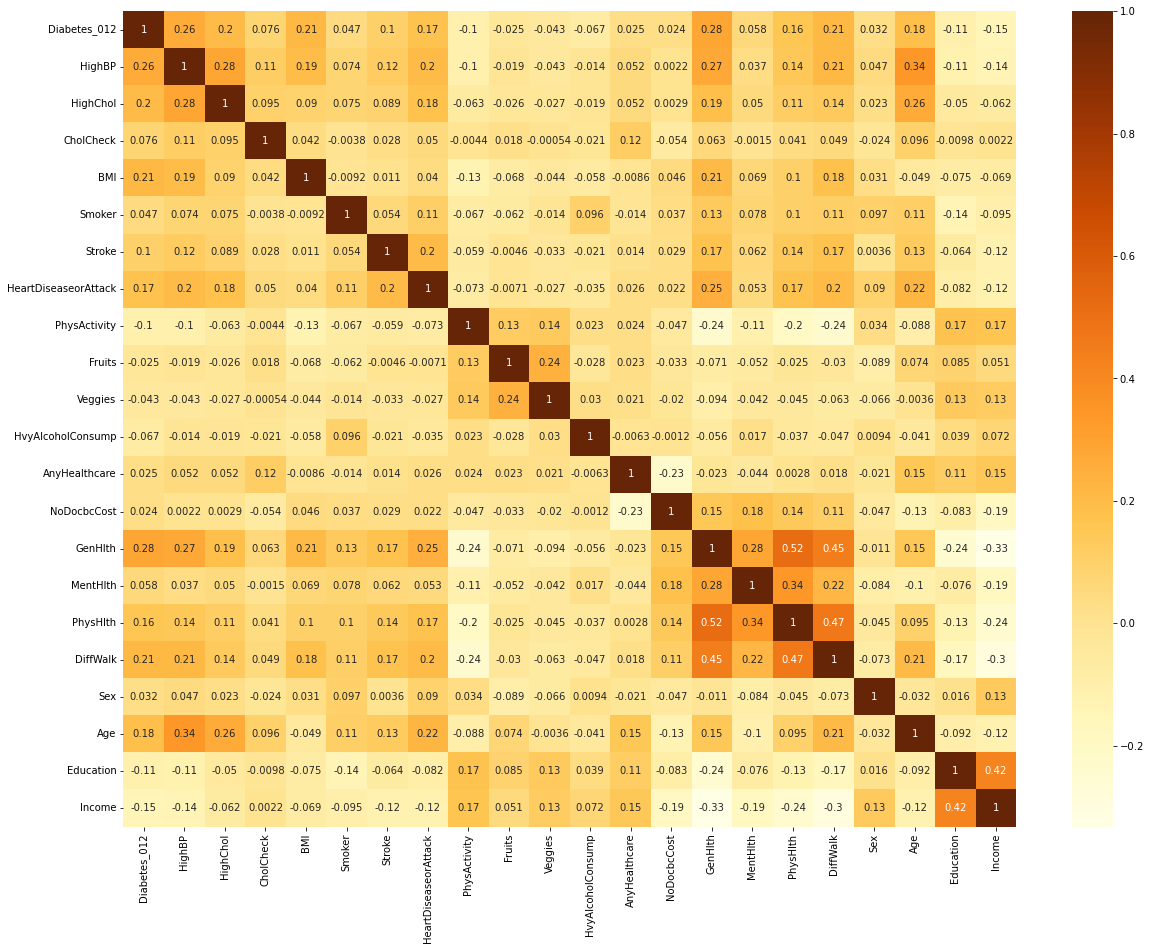

In [18]:
# Showing Correlation HeatMap
plt.figure(figsize=(20,15))
sb.heatmap(diabete_df_clean.corr(), annot=True,cmap = 'YlOrBr')

In [19]:
#Showing Smokers&GeneralHealth(1=Excellent,5=Poor) in Bar Chart
df_smoker_GenHealth = pd.DataFrame({'GeneralHealth': ['Excellent', 'VeryGood', 'Good', 'Fair', 'Poor'],               
                    'NonSmoker': [21902, 44203, 38350, 14088, 4238],
                    'Smoker': [13005, 33333, 35364, 17458 , 7840]})
   

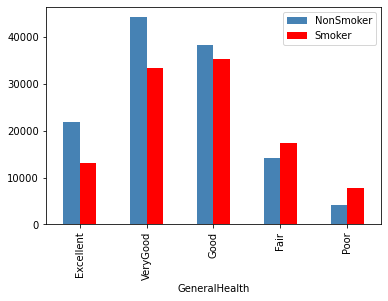

In [20]:
#Showing Smokers & GeneralHealth(1=Excellent,5=Poor) in BarChart
#barplot = crosstab_smoker_GenHealth.plot.bar(rot=1)
df_smoker_GenHealth.set_index('GeneralHealth').plot(kind='bar', color=['steelblue', 'red'])
plt.show()

''

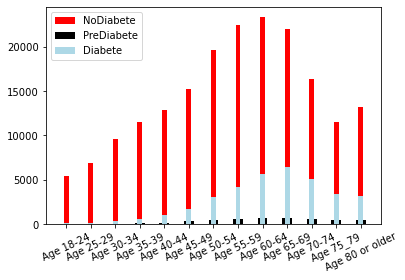

In [22]:
#Showing People (With different Disease Status) in different Age category
#1   Age 18-24
#2   Age 25-29
#3   Age 30-34
#4   Age 35-39
#5   Age 40-44
#6   Age 45-49
#7   Age 50-54
#8   Age 55-59
#9   Age 60-64
#10  Age 65-69
#11  Age 70-74
#12  Age 75_79
#13  Age 80 or older
Age_Group = ['Age 18-24','Age 25-29','Age 30-34','Age 35-39','Age 40-44','Age 45-49','Age 50-54','Age 55-59',' Age 60-64','Age 65-69','Age 70-74','Age 75_79','Age 80 or older']
No_diabete = [5413,6874,9639,11467,12838,15246,19650,22510,23353,21988,16350,11566,13161]
Pre_diabete = [21,54,72,142,163,312,418,550,702,697,601,445,452]
Diabete=[78,140,314,625,1049,1741,3072,4241,5681,6483,5090,3383,3200]

#plt.figure()

plt.bar(Age_Group , No_diabete, color='red', edgecolor='none', width=0.2, label='NoDiabete')
plt.bar(Age_Group , Pre_diabete, color='black', edgecolor='none',width=0.4, label='PreDiabete')
plt.bar(Age_Group , Diabete, color='lightblue', edgecolor='none', width=0.2,label='Diabete')
plt.xticks(label='ddm', rotation=25)
#plt.yticks()
plt.legend()
;

In [39]:
#To compare different group of people who are in the same level :(High school graduated, Healthy and their General Health is Excellent).
# To define a Masks
#Create a New DataFrame which shows people WHO are Healthy in terms of weight and College graduated
NoBinaryData_df.Education_Level=='High School Graduated'
NoBinaryData_df.GeneralH=='Excellent'
NoBinaryData_df.Weight_Group=='Healthy'
#To apply MASK on our DataFrame
DF_MASK_APPLY=NoBinaryData_df[(NoBinaryData_df.Education_Level=='College Graduate')&(NoBinaryData_df.Weight_Group=='Healthy')&(NoBinaryData_df.GeneralH=='Excellent')]
crosstab_Age_Income=pd.crosstab(DF_MASK_APPLY.Age_Group, DF_MASK_APPLY.Income_Level)
crosstab_Age_Income

Income_Level,75000 $ or More,Less than 10000 $,Less than 15000 $,Less than 20000 $,Less than 25000 $,Less than 35000 $,Less than 50000 $,Less than 75000 $
Age_Group,,,,,,,,
Age 18-24,67,10,10,14,14,28,37,44
Age 25-29,186,16,6,13,32,30,90,101
Age 30-34,334,6,7,15,13,27,68,123
Age 35-39,411,5,1,4,10,19,50,94
Age 40-44,463,4,2,10,4,11,43,114
Age 45-49,488,2,4,8,17,19,48,95
Age 50-54,517,7,2,9,10,29,70,127
Age 55-59,491,10,7,15,17,35,75,158
Age 60-64,502,6,14,19,19,52,104,175


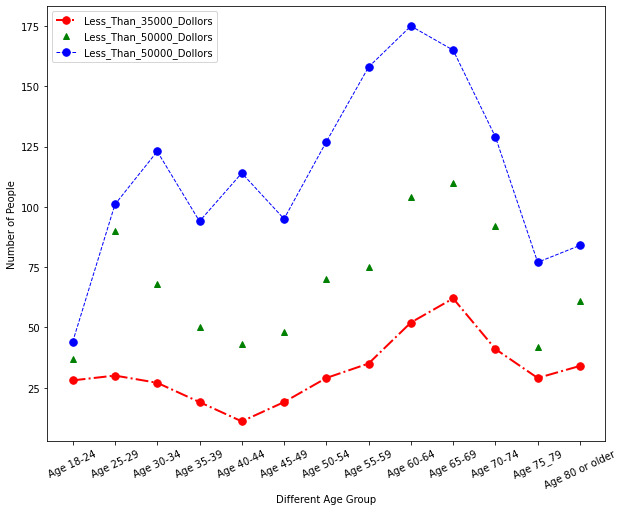

In [54]:
Age_list1=['Age 18-24','Age 25-29','Age 30-34','Age 35-39','Age 40-44','Age 45-49','Age 50-54','Age 55-59','Age 60-64','Age 65-69','Age 70-74','Age 75_79','Age 80 or older']
Less_Than_35000_Dollors=[28,30,27,19,11,19,29,35,52,62,41,29,34]
Less_Than_50000_Dollors=[37,90,68,50,43,48,70,75,104,110,92,42,61]
Less_Than_75000_Dollors=[44,101,123,94,114,95,127,158,175,165,129,77,84]
len(Age_list1)==len(Less_Than_35000_Dollors)
len(Age_list1)==len(Less_Than_50000_Dollors)
len(Age_list1)==len(Less_Than_75000_Dollors)
plt.figure(figsize=(10,8))
plt.plot(Age_list1,Less_Than_35000_Dollors,label='Less_Than_35000_Dollors',color='red',linestyle='-.',linewidth=2,marker='.',markersize=15)
plt.plot(Age_list1,Less_Than_50000_Dollors,'^g',label='Less_Than_50000_Dollors')
plt.plot(Age_list1,Less_Than_75000_Dollors,label='Less_Than_50000_Dollors',color='blue',linestyle='--',linewidth=1,marker='.',markersize=15)
plt.legend()
plt.xticks(label='ddm', rotation=25)
plt.xlabel('Different Age Group')
plt.ylabel('Number of People')
plt.show()
#plt.plot(year_list1,apple_price,label='apple',color='red', linestyle='-.', linewidth=2,marker='.',markersize=15, markeredgecolor='blue')

<AxesSubplot:xlabel='0', ylabel='1'>

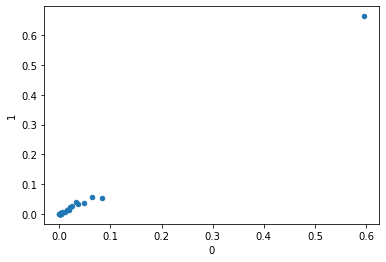

In [55]:
#Scatter plot
#0=PhysHlt -1=MentHlth
A=diabete_df_clean.PhysHlth.value_counts(normalize=True)
B=diabete_df_clean.MentHlth.value_counts(normalize=True)
A_df=pd.DataFrame(A)
B_df=pd.DataFrame(B)
AB_df=pd.concat([A,B],axis=1,ignore_index=True)
AB_df
AB_df.plot(kind="scatter", x=0, y=1)